# **AI Basic**

In today's era, **Artificial Intelligence (AI)** is considered a revolutionized field of Information Technology (IT) and Data Science. AI is concerned with machines that demonstrate the perception of a problem, evaluate the solution in abstraction through symbolic processing and learn from the activity. Currently, AI has huge demand in sectors of industry such as the economy, finance, security, and health departments, etc.

**Machine Learning** is a subset of AI and it is a method to extract knowledge from past experiences which are used to find patterns based on historical data. It has three main types: supervised learning, unsupervised learning, and reinforcement learning. Firstly, supervised learning is the learning by given data with input/output pairs. Secondly, unsupervised learning is the learning from analogies in which data with input and without output/labels are used to train models. Lastly, reinforcement learning is learning by maximization of delayed rewards known as learning from feedback.

# **Import libraries**

In [ ]:
import pickle # to save model
import pandas as pd # visualize data in dataframe form(tabular form)
import seaborn as sns # visualize data
import numpy as np # library for arrays
import plotly.express as px # visualize data
import matplotlib.pyplot as plt # visualize data
from wordcloud import WordCloud, STOPWORDS # visualize textual data
from sklearn.feature_extraction.text import TfidfVectorizer # Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.neighbors import NearestNeighbors # Neighbor searches.
from sklearn.metrics.pairwise import cosine_similarity # Compute cosine similarity
from sklearn.preprocessing import OneHotEncoder # Encode categorical features as a one-hot numeric array.

# **Download Dataset - Bangladesh Medicine**

In [ ]:
# upload kaggle file to download dataset from kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avinashmaheshwari","key":"29d6a0452946c33775ce35e4de0b9892"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download medicine dataset of bangladesh
!kaggle datasets download -d ahmedshahriarsakib/assorted-medicine-dataset-of-bangladesh

  0% 0.00/2.96M [00:00<?, ?B/s]
100% 2.96M/2.96M [00:00<00:00, 54.2MB/s]


In [ ]:
# store medicine dataset into dataset folder
!mkdir datasets
!unzip /content/assorted-medicine-dataset-of-bangladesh.zip -d datasets

Archive:  /content/assorted-medicine-dataset-of-bangladesh.zip
  inflating: datasets/dosage form.csv  
  inflating: datasets/drug class.csv  
  inflating: datasets/generic.csv    
  inflating: datasets/indication.csv  
  inflating: datasets/manufacturer.csv  
  inflating: datasets/medicine.csv   


# **EDA**

In [ ]:
# read CSV as dataframe using pandas library
df = pd.read_csv('/content/datasets/medicine.csv', encoding = "utf-8")

In [ ]:
# check top 5 rows from csv
df.head()

,brand id,brand name,type,slug,dosage form,generic,strength,manufacturer,package container,Package Size
0,4077,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 40.12,NaN
1,4006,A-Cof,allopathic,a-cofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 100.00,NaN
2,6174,A-Clox,allopathic,a-cloxinjection500-mgvial,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,"500 mg vial: ৳ 28.43,(5's pack: ৳ 142.15),",(5's pack: ৳ 142.15)
3,6173,A-Clox,allopathic,a-cloxinjection250-mgvial,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,"250 mg vial: ৳ 20.00,(5's pack: ৳ 100.00),",(5's pack: ৳ 100.00)
4,6172,A-Clox,allopathic,a-cloxpowder-for-suspension125-mg5-ml,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100 ml bottle: ৳ 45.00,NaN


In [ ]:
# check last 5 rows
df.tail()

,brand id,brand name,type,slug,dosage form,generic,strength,manufacturer,package container,Package Size
21709,12005,Zytec,allopathic,zytectablet10-mg,Tablet,Cetirizine Hydrochloride,10 mg,Desh Pharmaceuticals Ltd.,"Unit Price: ৳ 1.50,(100's pack: ৳ 150.00),",(100's pack: ৳ 150.00)
21710,31435,Zypred,allopathic,zypredophthalmic-suspension0503,Ophthalmic Suspension,Loteprednol Etabonate + Gatifloxacin,0.5%+0.3%,Aristopharma Ltd.,5 ml drop: ৳ 250.00,NaN
21711,30406,Zymet Pro,allopathic,zymet-procapsule325-mg,Capsule,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 10.00,(90's pack: ৳ 900.00),,Uni...","(90's pack: ৳ 900.00),(60's pack: ৳ 600.00)"
21712,2435,Zymet,allopathic,zymettablet325-mg,Tablet,Pancreatin,325 mg,Beximco Pharmaceuticals Ltd.,"Unit Price: ৳ 3.50,(100's pack: ৳ 350.00),",(100's pack: ৳ 350.00)
21713,20604,Zymarin,allopathic,zymarinophthalmic-solution05,Ophthalmic Solution,Gatifloxacin (Ophthalmic),0.50%,Eskayef Pharmaceuticals Ltd.,5 ml drop: ৳ 125.00,NaN


In [ ]:
# shape of dataframe - rows: 21714 and columns : 10
df.shape

(21714, 10)

In [ ]:
# describe dataset here is only brand id because it's only integer column in dataset remaining are objects
df.describe()

,brand id
count,21714.000000
mean,16370.435019
std,10289.034379
min,1.000000
25%,7374.250000
50%,14587.500000
75%,27078.750000
max,33198.000000


In [ ]:
# get dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21714 entries, 0 to 21713
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand id           21714 non-null  int64 
 1   brand name         21714 non-null  object
 2   type               21714 non-null  object
 3   slug               21714 non-null  object
 4   dosage form        21714 non-null  object
 5   generic            21712 non-null  object
 6   strength           20865 non-null  object
 7   manufacturer       21714 non-null  object
 8   package container  21672 non-null  object
 9   Package Size       13935 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.7+ MB


# **clean dataset**

**drop brand_id column**

In [ ]:
# Removing columns 'brand id' and 'Package Size' from the DataFrame
df.drop(["brand id", "Package Size"],axis=1, inplace=True)

**check duplicates and drop it**

In [ ]:
# Checking for duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# If no duplicates are found, print a message indicating so
if duplicates.empty:
    print("No duplicates found.")
# If duplicates are found, print the duplicate rows
else:
    print("Duplicate rows:")
    print(duplicates)

Duplicate rows:
        brand name        type                           slug  \
1716     Asthmolin  allopathic            asthmolintablet2-mg   
2840       Bpcal D  allopathic      bpcal-dtablet500-mg200-iu   
3202   Calock Plus  allopathic     calock-plustablet5-mg50-mg   
4512        Cloron  allopathic               clorontablet2-mg   
12637      Motodon  allopathic             motodontablet10-mg   
15772      Prednol  allopathic  prednolophthalmic-suspension1   

                 dosage form  \
1716                  Tablet   
2840                  Tablet   
3202                  Tablet   
4512                  Tablet   
12637                 Tablet   
15772  Ophthalmic Suspension   

                                                 generic       strength  \
1716                                          Salbutamol           2 mg   
2840   Calcium Carbonate [Elemental source] + Vitamin D3  500 mg+200 IU   
3202                      Amlodipine Besilate + Atenolol     5 mg+50 mg   
451

In [ ]:
# Dropping duplicate rows from the DataFrame in place
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(21708, 8)

In [ ]:
# Generating descriptive statistics for columns with object data type and transposing the result for better readability
df.describe(include=['object']).T


,count,unique,top,freq
brand name,21708,13934,Renova,9
type,21708,2,allopathic,21357
slug,21708,21591,milk-of-magnesiaoral-suspension400-mg5-ml,4
dosage form,21708,112,Tablet,9324
generic,21706,1661,Cefixime Trihydrate,341
strength,20859,1033,500 mg,1298
manufacturer,21708,232,Incepta Pharmaceuticals Ltd.,1182
package container,21666,7364,"Unit Price: ৳ 10.00,(30's pack: ৳ 300.00),",505


**check missing values in data**

In [ ]:
# Calculating the count of missing values for each column and sorting them in descending order
missing_values = df.isna().sum().sort_values(ascending=False)

# Calculating the percentage of missing values for each column
missing_value_stats = (df.isnull().sum() / len(df) * 100)

# Counting the number of columns with missing values
missing_value_count = sum(missing_value_stats > 0)

In [ ]:
# Concatenating the missing values count and percentage statistics into a DataFrame
missing_data = pd.concat([missing_values, missing_value_stats], axis=1, keys=['Total', 'Percentage(%)'])

# Printing the number of rows with at least one missing value
print("Number of rows with at least 1 missing values:", df.isna().any(axis=1).sum())

# Printing the number of columns with missing values
print("Number of columns with missing values:", missing_value_count)

Number of rows with at least 1 missing values: 893
Number of columns with missing values: 3


In [ ]:
# Print out column names with missing value percentage
print("\nMissing percentage (descending):")
print(missing_data[:missing_value_count])


Missing percentage (descending):
                   Total  Percentage(%)
strength             849       3.911001
package container     42       0.193477
generic                2       0.009213


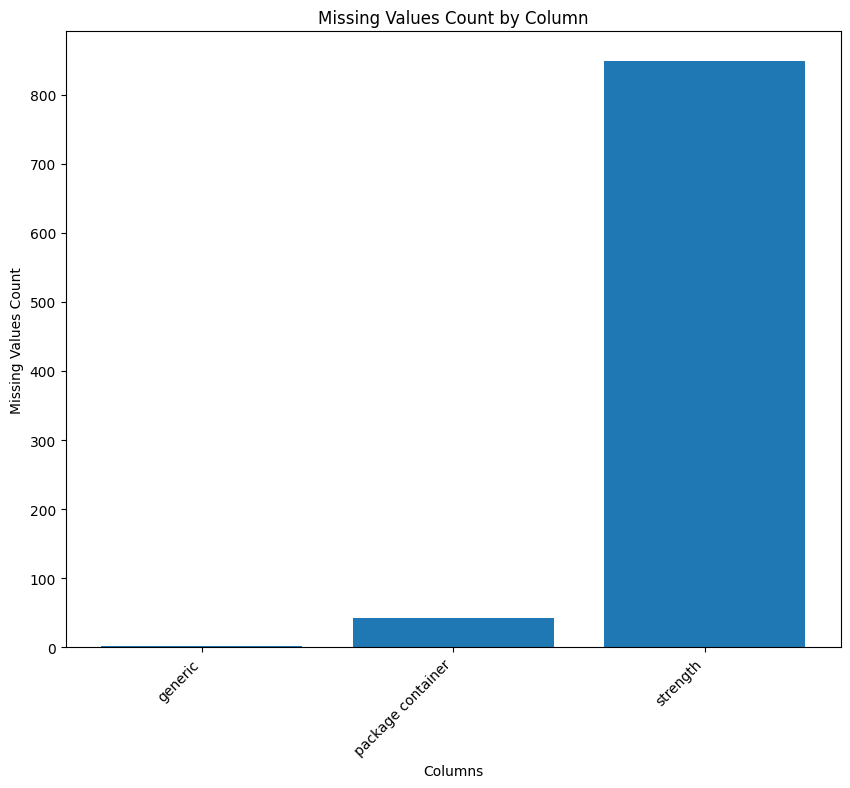

In [ ]:
# Plotting missing values count for columns with missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize=(10, 8))
plt.bar(missing.index, missing.values)
plt.title('Missing Values Count by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

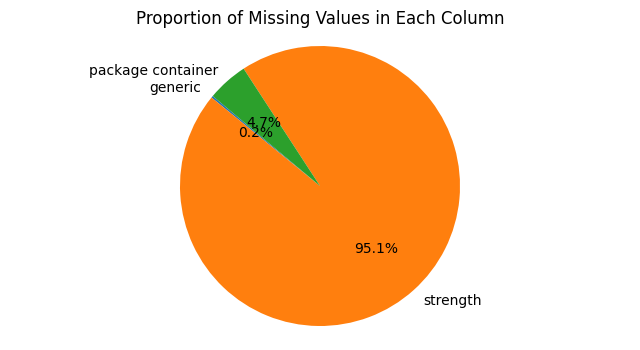

In [ ]:
# Calculate the proportion of missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing_percentage = missing / len(df) * 100

# Create a pie chart to visualize the proportion of missing values in each column
plt.figure(figsize=(8, 4))
plt.pie(missing_percentage, labels=missing_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Missing Values in Each Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Dropping rows with missing values from the DataFrame in place
df.dropna(inplace=True)

In [ ]:
df.shape

(20815, 8)

In [ ]:
# Extracting size, mg/ml, and price information from the 'package container' column
# Extracting size and mg/ml using regular expressions and filling missing values with '1'
size_price = df['package container'].str.extract(r'(?P<size>\d+\.?\d*)\s?(?P<mg_ml>[a-zA-Z]*)').fillna('1')

# Assigning extracted size and mg/ml values to new columns 'size' and 'mg_ml'
df['size'] = size_price['size']
df['mg_ml'] = size_price['mg_ml']

# Extracting price using regular expressions
df['price'] = df['package container'].str.extract(r'(?P<price>\d+\.\d+)')

# Replacing 'mg_ml' with 'piece' where 'size' is '1' or 'mg_ml' is empty
df.loc[df['size'] == '1', 'mg_ml'] = 'piece'
df.loc[df['mg_ml'].eq(''), 'mg_ml'] = 'piece'

In [ ]:
# Checking the number of missing values in each column of the DataFrame
df.isnull().sum()

brand name            0
type                  0
slug                  0
dosage form           0
generic               0
strength              0
manufacturer          0
package container     0
size                  0
mg_ml                 0
price                34
dtype: int64

In [ ]:
# Filter rows where both 'size' and 'price' are null
missing_values = df[(df['price'].isnull())]

print("Package Container and Slug where both Size and Price are Null:")
for index, row in missing_values.iterrows():
    print(f"Package Container: {row['package container']}, Slug: {row['slug']}, dosage: {row['dosage form']}")

Package Container and Slug where both Size and Price are Null:
Package Container: Price Unavailable, Slug: gynolaccapsule23-billion, dosage: Capsule
Package Container: Price Unavailable, Slug: laxadil-sennaeffervescent-powder35-gm75-mg538-gm, dosage: Effervescent Powder
Package Container: Price Unavailable, Slug: lactofloracapsule2-billion, dosage: Capsule
Package Container: Price Unavailable, Slug: menoherbcapsule40-mg, dosage: Capsule
Package Container: Price Unavailable, Slug: ocuberrycapsule160-mg, dosage: Capsule
Package Container: Price Unavailable, Slug: turmericcapsule1000-mg, dosage: Capsule
Package Container: Price Unavailable, Slug: uricancapsule400-mg, dosage: Capsule
Package Container: Price Unavailable, Slug: afatintablet40-mg, dosage: Tablet
Package Container: Price Unavailable, Slug: bilan-kidsdispersible-tablet10-mg, dosage: Dispersible Tablet
Package Container: Price Unavailable, Slug: cabazolcream1, dosage: Cream
Package Container: Not for sale, Slug: dextroseiv-infu

In [ ]:
df.shape

(20815, 11)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(20781, 11)

In [ ]:
# check unique values from different columns
df["type"].unique()

array(['allopathic', 'herbal'], dtype=object)

In [ ]:
# List of columns to drop from the DataFrame
columns_to_drop = ['package container']

# Dropping specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df.to_csv("medicine.csv", sep='\t', encoding='utf-8')

In [ ]:
df.to_csv("medicine1.csv", encoding='utf-8', index=False)

# **Visualizations**

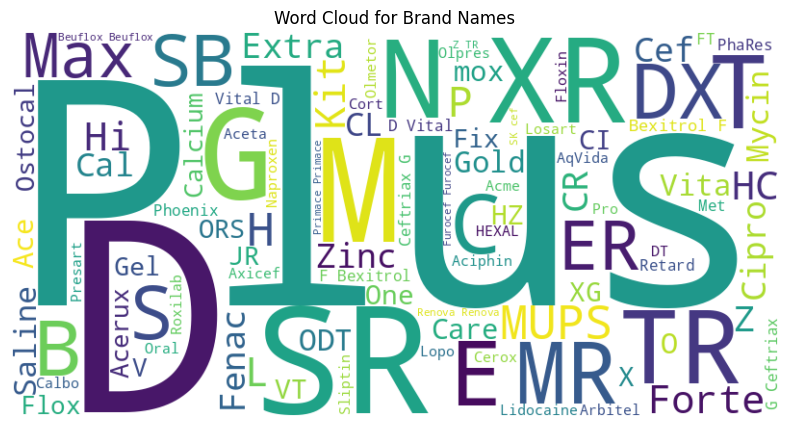

In [ ]:
# Combine all 'brand name' entries into a single string
text = ' '.join(df['brand name'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Brand Names')
plt.axis('off')
plt.show()

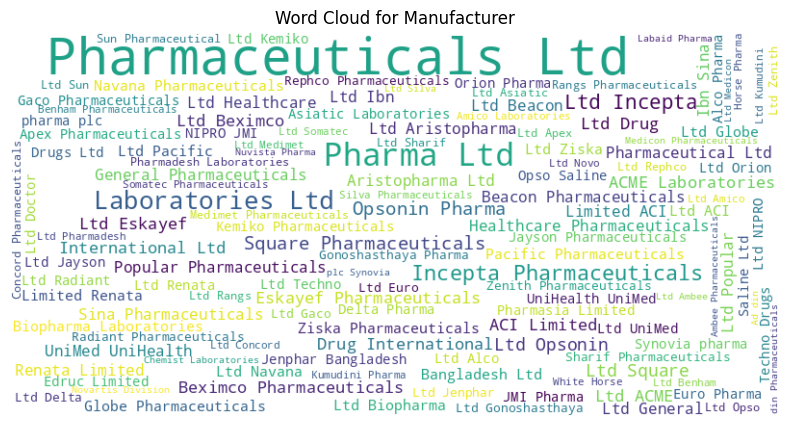

In [ ]:
# Combine all 'manufacturer' entries into a single string
text = ' '.join(df['manufacturer'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Manufacturer')
plt.axis('off')
plt.show()

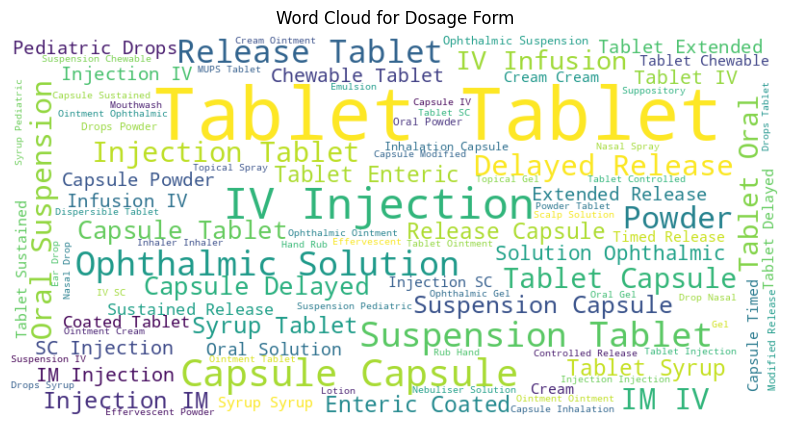

In [ ]:
# Combine all 'dosage form' entries into a single string
text = ' '.join(df['dosage form'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Dosage Form')
plt.axis('off')
plt.show()

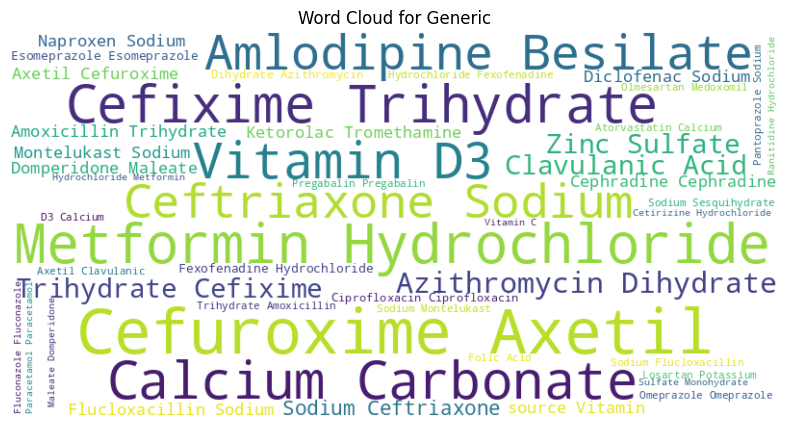

In [ ]:
# Combine all 'generic' entries into a single string
text = ' '.join(df['generic'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', min_font_size = 10).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Generic')
plt.axis('off')
plt.show()

In [ ]:
def top_plot(col_name, rows):
    # Get top 'rows' values of the specified column along with counts and percentages
    tdf = df[col_name].value_counts(normalize=True).reset_index()
    tdf.columns = [col_name.title(), 'Percentage']
    tdf['Counts'] = (tdf['Percentage'] * len(df)).astype(int)
    tdf = tdf.head(rows)

    # Concatenate counts and percentages for display
    tdf['Count_Pct'] = tdf['Counts'].astype(str) + ' (' + (tdf['Percentage'] * 100).round(2).astype(str) + '%)'

    # Plot
    fig = px.bar(tdf, x=col_name.title(), y='Counts', text='Count_Pct',
                 title='Top ' + str(rows) + ' ' + col_name.title(),
                 labels={'Counts': 'Count', col_name.title(): col_name.title()})
    fig.update_traces(texttemplate='%{text}', textposition='inside')
    fig.update_layout(yaxis_title="Count")
    fig.show()

In [ ]:
col_name = 'dosage form'
top_plot(col_name, 10)

In [ ]:
col_name = 'manufacturer'
top_plot(col_name, 15)

In [ ]:
col_name = 'generic'
top_plot(col_name, 10)

In [ ]:
col_name = 'strength'
top_plot(col_name, 10)

# **Model-1**


In [ ]:
df.head()

,brand name,type,slug,dosage form,generic,strength,manufacturer,size,mg_ml,price
0,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12
1,A-Cof,allopathic,a-cofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100,ml,100.00
2,A-Clox,allopathic,a-cloxinjection500-mgvial,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,500,mg,28.43
3,A-Clox,allopathic,a-cloxinjection250-mgvial,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,250,mg,20.00
4,A-Clox,allopathic,a-cloxpowder-for-suspension125-mg5-ml,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100,ml,45.00


In [ ]:
# Preprocess the data
def preprocess_data(df_new):
    # Concatenate all columns into one feature
    df_new['features'] = df_new.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    return df_new

df1 = preprocess_data(df)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['features'])

# Initialize Nearest Neighbors model
nn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)  # You can adjust n_neighbors as needed

# Fit the model
nn_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [ ]:
# Function to get recommendations
def get_recommendations(user_input, nn_model=nn_model):
    # Transform the user input using the TF-IDF vectorizer
    input_tfidf = tfidf_vectorizer.transform([user_input])

    # Find nearest neighbors
    distances, indices = nn_model.kneighbors(input_tfidf)

    # Get recommended items with similarity scores
    recommendations = df1.iloc[indices[0]]
    similarity_scores = 1 - distances.flatten()  # Convert cosine distances to similarity scores

    # Add similarity scores to recommendations
    recommendations['similarity'] = similarity_scores * 100  # Convert to percentage

    return recommendations

# Example usage
user_input = "A-Cold allopathic 100 ml 40.12 Syrup"

recommendations = get_recommendations(user_input)

recommendations

<ipython-input-46-436ca2515f10>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,brand name,type,slug,dosage form,generic,strength,manufacturer,size,mg_ml,price,features,similarity
0,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12,A-Cold allopathic a-coldsyrup4-mg5-ml Syrup Br...,65.721636
20943,X-Cold,allopathic,x-coldsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12,X-Cold allopathic x-coldsyrup15-mg5-ml Syrup A...,64.827056
4651,Cold B,allopathic,cold-btablet4-mg,Tablet,Bromhexine Hydrochloride,4 mg,Medimet Pharmaceuticals Ltd.,0.70,piece,0.70,Cold B allopathic cold-btablet4-mg Tablet Brom...,53.378089
5221,De-Cold,allopathic,de-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,Aexim Pharmaceuticals Ltd.,100,ml,30.00,De-Cold allopathic de-coldsyrup4-mg5-ml Syrup ...,37.154732
20986,X-Cold,allopathic,x-coldpediatric-drops6-mgml,Pediatric Drops,Ambroxol Hydrochloride,6 mg/ml,ACME Laboratories Ltd.,15,ml,30.10,X-Cold allopathic x-coldpediatric-drops6-mgml ...,35.408854
129,E-Cold,herbal,e-coldcapsule450-mg,Capsule,Echinacea,450 mg,Ibn Sina Pharmaceuticals Ltd.,5.00,piece,5.00,E-Cold herbal e-coldcapsule450-mg Capsule Echi...,32.138411
9714,Hybrox,allopathic,hybroxsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,Kemiko Pharmaceuticals Ltd.,100,ml,40.12,Hybrox allopathic hybroxsyrup15-mg5-ml Syrup A...,31.090119
2927,Brolyt,allopathic,brolytsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,Alco Pharma Ltd.,100,ml,40.12,Brolyt allopathic brolytsyrup4-mg5-ml Syrup Br...,30.932979
800,Ambronil,allopathic,ambronilsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,Orion Pharma Ltd.,100,ml,40.12,Ambronil allopathic ambronilsyrup15-mg5-ml Syr...,30.782237
2956,Broxolin,allopathic,broxolinsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,Jayson Pharmaceuticals Ltd.,100,ml,40.12,Broxolin allopathic broxolinsyrup15-mg5-ml Syr...,30.577178


In [ ]:
def visualize_recommendations(recommendations):
    """
    Visualizes the distribution of recommended brand names using a histogram.

    Parameters:
    recommendations (DataFrame): DataFrame containing recommendations data.

    Returns:
    None
    """
    # Creating a histogram of recommended brand names
    plt.hist(recommendations['brand name'], bins=20, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('Brand Name')
    plt.ylabel('Frequency')
    plt.title('Distribution of Recommended Brand Names')

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Displaying the plot
    plt.show()

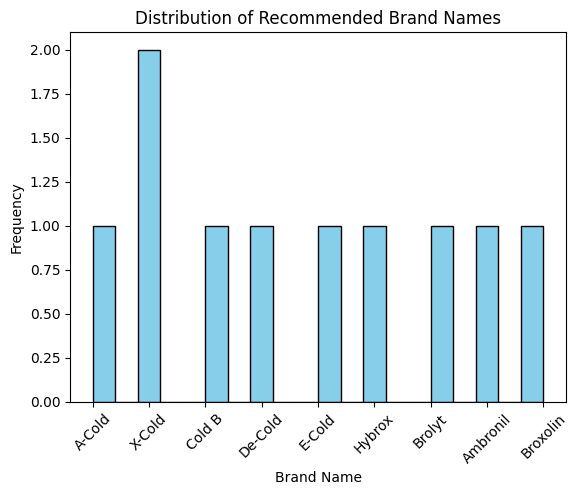

In [ ]:
visualize_recommendations(recommendations)

In [ ]:
# Function to calculate diversity of recommended items
def calculate_diversity(recommendations):
    unique_brands = recommendations['brand name'].unique()
    diversity = len(unique_brands) / len(recommendations)
    return diversity

# Function to calculate novelty of recommended items
def calculate_novelty(recommendations):
    unique_dosage_forms = recommendations['dosage form'].unique()
    novelty = len(unique_dosage_forms) / len(recommendations)
    return novelty

# Function to calculate coverage of recommended items
def calculate_coverage(recommendations, total_items):
    coverage = len(recommendations) / total_items
    return coverage

In [ ]:
# Calculate total number of items in the dataset (assuming 'brand name' as identifier)
total_items = len(df['brand name'].unique())

diversity = calculate_diversity(recommendations)
novelty = calculate_novelty(recommendations)
coverage = calculate_coverage(recommendations, total_items)

print("Diversity:", diversity)
print("Novelty:", novelty)
print("Coverage:", coverage)

Diversity: 0.9
Novelty: 0.4
Coverage: 0.0007619047619047619


# **Model-2**

In [ ]:
df.head()

,brand name,type,slug,dosage form,generic,strength,manufacturer,size,mg_ml,price
0,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12
1,A-Cof,allopathic,a-cofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,ACME Laboratories Ltd.,100,ml,100.00
2,A-Clox,allopathic,a-cloxinjection500-mgvial,Injection,Cloxacillin Sodium,500 mg/vial,ACME Laboratories Ltd.,500,mg,28.43
3,A-Clox,allopathic,a-cloxinjection250-mgvial,Injection,Cloxacillin Sodium,250 mg/vial,ACME Laboratories Ltd.,250,mg,20.00
4,A-Clox,allopathic,a-cloxpowder-for-suspension125-mg5-ml,Powder for Suspension,Cloxacillin Sodium,125 mg/5 ml,ACME Laboratories Ltd.,100,ml,45.00


In [ ]:
# Preprocess the data
def preprocess_data(df_process):
    # Convert numerical features to string
    df_process['size'] = df_process['size'].astype(str)
    df_process['price'] = df_process['price'].astype(str)

    # Concatenate relevant features into one text column
    df_process['features'] = df_process['brand name'] + ' ' + df_process['dosage form'] + ' ' + df_process['size'] + ' ' + df_process['price']
    return df_process

In [ ]:
df_process = preprocess_data(df)

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_process['features'])

In [ ]:
# Function to get recommendations
def get_recommendations(user_input, df, tfidf_matrix, tfidf_vectorizer):
    # Transform the user input using the TF-IDF vectorizer
    input_tfidf = tfidf_vectorizer.transform([user_input])

    # Calculate cosine similarity between the input and all items
    similarity_scores = cosine_similarity(input_tfidf, tfidf_matrix)

    # Get indices of top recommendations
    top_indices = similarity_scores.argsort()[0][::-1][:10]  # Select top 10 recommendations

    # Get recommended items with similarity scores
    recommendations = df.iloc[top_indices]
    similarity_percentage = similarity_scores[0][top_indices] * 100

    # Add similarity percentage to recommendations
    recommendations['similarity_percentage'] = similarity_percentage

    return recommendations

In [ ]:
# Example usage
user_input = "A-Cold 100 Syrup 40.12"

recommendations = get_recommendations(user_input, df, tfidf_matrix, tfidf_vectorizer)

recommendations

<ipython-input-81-d8ecc04b96f1>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,brand name,type,slug,dosage form,generic,strength,manufacturer,size,mg_ml,price,features,similarity_percentage
0,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12,A-Cold Syrup 100 40.12,100.000000
20943,X-Cold,allopathic,x-coldsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12,X-Cold Syrup 100 40.12,100.000000
129,E-Cold,herbal,e-coldcapsule450-mg,Capsule,Echinacea,450 mg,Ibn Sina Pharmaceuticals Ltd.,5.00,piece,5.00,E-Cold Capsule 5.00 5.00,66.297852
5221,De-Cold,allopathic,de-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,Aexim Pharmaceuticals Ltd.,100,ml,30.00,De-Cold Syrup 100 30.00,60.481081
20986,X-Cold,allopathic,x-coldpediatric-drops6-mgml,Pediatric Drops,Ambroxol Hydrochloride,6 mg/ml,ACME Laboratories Ltd.,15,ml,30.10,X-Cold Pediatric Drops 15 30.10,48.484552
4651,Cold B,allopathic,cold-btablet4-mg,Tablet,Bromhexine Hydrochloride,4 mg,Medimet Pharmaceuticals Ltd.,0.70,piece,0.70,Cold B Tablet 0.70 0.70,48.403565
9714,Hybrox,allopathic,hybroxsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,Kemiko Pharmaceuticals Ltd.,100,ml,40.12,Hybrox Syrup 100 40.12,45.005489
2927,Brolyt,allopathic,brolytsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,Alco Pharma Ltd.,100,ml,40.12,Brolyt Syrup 100 40.12,45.005489
823,Ambokof,allopathic,ambokofsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,Novelta Bestway Pharma Ltd.,100,ml,40.12,Ambokof Syrup 100 40.12,44.248465
800,Ambronil,allopathic,ambronilsyrup15-mg5-ml,Syrup,Ambroxol Hydrochloride,15 mg/5 ml,Orion Pharma Ltd.,100,ml,40.12,Ambronil Syrup 100 40.12,44.248465


In [ ]:
# Function to save the model
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
save_model((tfidf_matrix, tfidf_vectorizer), 'recommendation_model.pkl')

In [ ]:
# Function to load the model
def load_model(filename):
    with open(filename, 'rb') as file:
        tfidf_matrix, tfidf_vectorizer = pickle.load(file)
    return tfidf_matrix, tfidf_vectorizer
tfidf_matrix, tfidf_vectorizer = load_model('recommendation_model.pkl')

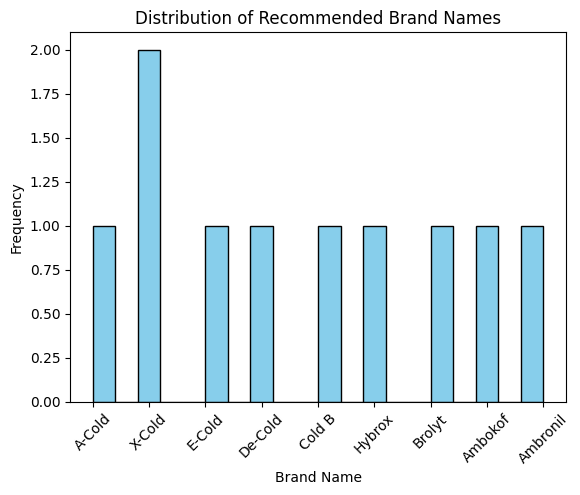

In [ ]:
visualize_recommendations(recommendations)

In [ ]:
# Function to calculate diversity of recommended items
def calculate_diversity(recommendations):
    unique_brands = recommendations['brand name'].unique()
    diversity = len(unique_brands) / len(recommendations)
    return diversity

# Function to calculate novelty of recommended items
def calculate_novelty(recommendations):
    unique_dosage_forms = recommendations['dosage form'].unique()
    novelty = len(unique_dosage_forms) / len(recommendations)
    return novelty

# Function to calculate coverage of recommended items
def calculate_coverage(recommendations, total_items):
    coverage = len(recommendations) / total_items
    return coverage

In [ ]:
# Calculate total number of items in the dataset (assuming 'brand name' as identifier)
total_items = len(df['brand name'].unique())

diversity = calculate_diversity(recommendations)
novelty = calculate_novelty(recommendations)
coverage = calculate_coverage(recommendations, total_items)

print("Diversity:", diversity)
print("Novelty:", novelty)
print("Coverage:", coverage)

Diversity: 0.9
Novelty: 0.4
Coverage: 0.0007619047619047619


# **Model-3**

In [ ]:
# User input
user_brand_name = 'Skytex'
user_dosage_form = 'Syrup'
user_size = 15
user_price = 5

# Convert user input to DataFrame
user_df = pd.DataFrame({
    'brand name': [user_brand_name],
    'dosage form': [user_dosage_form],
    'size': [user_size],
    'price': [user_price]
})

In [ ]:
# Concatenate user input with the original DataFrame
concatenated_df = pd.concat([df, user_df], ignore_index=True)

# Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(concatenated_df[['brand name', 'dosage form']])

# Compute similarity for each item in the dataset
similarities = cosine_similarity(encoded_data[-1], encoded_data[:-1])

In [ ]:
# Get indices of top N similar items
N = 10
top_indices = similarities.argsort()[0][-N:][::-1]

# Filter and recommend top N items
recommended_items = df.iloc[top_indices]

# Calculate similarity percentage directly from similarity scores
similarity_percentage = similarities[0][top_indices] * 100

# Add similarity percentage to recommended items
recommended_items['similarity_percentage'] = similarity_percentage

<ipython-input-116-2dbb5a7ab232>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
recommended_items

,brand name,type,slug,dosage form,generic,strength,manufacturer,size,mg_ml,price,similarity_percentage
18230,Skytex,allopathic,skytexsyrup40-mg5-ml,Syrup,Levamisole,40 mg/5 ml,Skylab Pharmaceuticals Ltd.,15,ml,6.00,100.0
0,A-Cold,allopathic,a-coldsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,ACME Laboratories Ltd.,100,ml,40.12,50.0
6307,Dyaferon,allopathic,dyaferonsyrup200-mg5-ml,Syrup,Ferrous Sulfate,200 mg/5 ml,Doctor’s Chemical Works Ltd.,200,ml,25.00,50.0
6258,Drycofix,allopathic,drycofixsyrup75-mg5-ml,Syrup,Butamirate Citrate,7.5 mg/5 ml,DBL Pharmaceuticals Ltd.,100,ml,80.00,50.0
16683,Relikof,allopathic,relikofsyrup125-mg5-ml,Syrup,Citric Acid Monohydrate,125 mg/5 ml,Concord Pharmaceuticals Ltd.,100,ml,48.00,50.0
7466,Expecto,allopathic,expectosyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,Aristopharma Ltd.,100,ml,40.00,50.0
7465,Expillin,allopathic,expillinsyrup2-mg5-ml,Syrup,Chlorpheniramine Maleate,2 mg/5 ml,Gaco Pharmaceuticals Ltd.,100,ml,21.50,50.0
7463,Expoten,allopathic,expotensyrup30-mg100-mg125-mg5-ml,Syrup,Pseudoephedrine + Guaiphenasine + Triprolidine,(30 mg+100 mg+1.25 mg)/5 ml,Eskayef Pharmaceuticals Ltd.,100,ml,65.00,50.0
14002,Ofkof,allopathic,ofkofsyrup10-mg30-mg125-mg5-ml,Syrup,Dextromethorphan + Pseudoephedrine + Triprolidine,(10 mg+30 mg+1.25 mg)/5 ml,Square Pharmaceuticals Ltd.,100,ml,80.00,50.0
12890,N Hexin,allopathic,n-hexinsyrup4-mg5-ml,Syrup,Bromhexine Hydrochloride,4 mg/5 ml,Nipa Pharmaceuticals Ltd.,100,ml,30.00,50.0


In [ ]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


Saving Medicine_Recommendation_system.ipynb to Medicine_Recommendation_system.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>